<a href="https://colab.research.google.com/github/kirtiipathak/RAGGEMMA/blob/main/credit_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#reading training and testing data
train=pd.read_csv('cs-training.csv')
#train.head()
test=pd.read_csv('cs-test.csv')
#test.head()

In [ ]:
train.shape #rows and cols

(150000, 12)

In [ ]:
test.shape

(101503, 12)

In [ ]:
#finding duplicate data in training data
#train.duplicated()
#train.duplicated().sum()
train.duplicated().value_counts()

,count
False,150000


In [ ]:
train_redup=train.drop_duplicates() #removing duplicate data
#train_redup.duplicated().sum()
train_redup.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
train_redup.shape

(150000, 12)

In [ ]:
#train_redup.isnull()
#train_redup.isnull().sum() #missing values check
def findMiss(df): #function to calculate percentage of missing values
  return round(df.isnull().sum()/df.shape[0]*100,2) #finding percentage of missing values and rounding off to 2 digits

In [ ]:
findMiss(train_redup) #checking function

,0
Unnamed: 0,0.00
SeriousDlqin2yrs,0.00
RevolvingUtilizationOfUnsecuredLines,0.00
age,0.00
NumberOfTime30-59DaysPastDueNotWorse,0.00
DebtRatio,0.00
MonthlyIncome,19.82
NumberOfOpenCreditLinesAndLoans,0.00
NumberOfTimes90DaysLate,0.00
NumberRealEstateLoansOrLines,0.00


we have to work on missing values for no of dependents and monthly income

In [ ]:
#train_redup.NumberOfDependents.isnull().sum() #total null values in no of dependents column
#train_redup[train_redup.NumberOfDependents.isnull().sum()] #filter all rows where there are missing values in one col
train_redup[train_redup.NumberOfDependents.isnull()].describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,3924.000000,3924.000000,3924.000000,3924.000000,3924.000000,3924.000000,0.0,3924.000000,3924.000000,3924.000000,3924.000000,0.0
mean,74510.281855,0.045617,10.745132,59.588940,0.908257,1083.812181,NaN,5.604230,0.834608,0.590979,0.812181,NaN
std,43703.084554,0.208679,237.699246,18.634168,8.679394,4186.731843,NaN,4.096353,8.679228,0.914455,8.678008,NaN
min,9.000000,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,36006.500000,0.000000,0.008474,48.000000,0.000000,21.000000,NaN,3.000000,0.000000,0.000000,0.000000,NaN
50%,74492.000000,0.000000,0.047458,61.000000,0.000000,358.000000,NaN,5.000000,0.000000,0.000000,0.000000,NaN
75%,112734.000000,0.000000,0.268155,74.000000,0.000000,1559.000000,NaN,8.000000,0.000000,1.000000,0.000000,NaN
max,149966.000000,1.000000,10821.000000,109.000000,98.000000,220516.000000,NaN,30.000000,98.000000,15.000000,98.000000,NaN


count is 3924 means there are 3924 records which have missing value for no of dependents.
Also we observe that for most cases where no of dependents is zero monthly income is also zero

In [ ]:
train_redup[train_redup.MonthlyIncome.isnull()].describe() #doing same for monthly income

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,29731.000000,29731.000000,29731.000000,29731.000000,29731.000000,29731.000000,0.0,29731.000000,29731.000000,29731.000000,29731.000000,25807.000000
mean,74897.295786,0.056137,6.649421,56.362349,0.579866,1673.396556,NaN,7.216071,0.484612,0.871481,0.452995,0.316310
std,43364.172076,0.230189,217.814854,15.438786,6.255361,4248.372895,NaN,4.842720,6.250408,1.034291,6.242076,0.809944
min,7.000000,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36769.500000,0.000000,0.016027,46.000000,0.000000,123.000000,NaN,4.000000,0.000000,0.000000,0.000000,0.000000
50%,75111.000000,0.000000,0.081697,57.000000,0.000000,1159.000000,NaN,6.000000,0.000000,1.000000,0.000000,0.000000
75%,112544.500000,0.000000,0.440549,67.000000,0.000000,2382.000000,NaN,10.000000,0.000000,1.000000,0.000000,0.000000
max,149998.000000,1.000000,22198.000000,109.000000,98.000000,329664.000000,NaN,45.000000,98.000000,23.000000,98.000000,9.000000


In [ ]:
#evaluating some statistics
train_redup['NumberOfDependents'].agg(['mode'])

,mode
0,0.0


most of the records have 0 dependents

In [ ]:
train_redup.groupby(['NumberOfDependents']).size()

,0
NumberOfDependents,
0.0,86902
1.0,26316
2.0,19522
3.0,9483
4.0,2862
5.0,746
6.0,158
7.0,51
8.0,24


there are 86902 records with 0 dependents
so will try to fill the missing values with 0

according to our observation, we will create a subset of data in which we will fill both, no of dependents and monthly income with 0(for those cells where both are 0)

In [ ]:
fam_miss=train_redup[train_redup.NumberOfDependents.isnull()] #fam(no of dependents) missing
fam_nmiss=train_redup[train_redup.NumberOfDependents.notnull()] #fam not missing

In [ ]:
#fam_miss.shape
fam_miss['NumberOfDependents']=fam_miss['NumberOfDependents'].fillna(0) #filling the subset of missing fam with No of dependents=0 & Monthly Income=0
fam_miss['MonthlyIncome']=fam_miss['MonthlyIncome'].fillna(0)

<ipython-input-15-974ce6407f5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['NumberOfDependents']=fam_miss['NumberOfDependents'].fillna(0) #filling the subset of missing fam with No of dependents=0 & Monthly Income=0
<ipython-input-15-974ce6407f5e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['MonthlyIncome']=fam_miss['MonthlyIncome'].fillna(0)


In [ ]:
findMiss(fam_miss)

,0
Unnamed: 0,0.0
SeriousDlqin2yrs,0.0
RevolvingUtilizationOfUnsecuredLines,0.0
age,0.0
NumberOfTime30-59DaysPastDueNotWorse,0.0
DebtRatio,0.0
MonthlyIncome,0.0
NumberOfOpenCreditLinesAndLoans,0.0
NumberOfTimes90DaysLate,0.0
NumberRealEstateLoansOrLines,0.0


no missing values in fam miss subset

In [ ]:
#fam_nmiss.shape
findMiss(fam_nmiss)

,0
Unnamed: 0,0.00
SeriousDlqin2yrs,0.00
RevolvingUtilizationOfUnsecuredLines,0.00
age,0.00
NumberOfTime30-59DaysPastDueNotWorse,0.00
DebtRatio,0.00
MonthlyIncome,17.67
NumberOfOpenCreditLinesAndLoans,0.00
NumberOfTimes90DaysLate,0.00
NumberRealEstateLoansOrLines,0.00


there are still missing values in monthly income for fam not miss subset. so we will try to fill the missing values

In [ ]:
#performing some stats
fam_nmiss['MonthlyIncome'].agg(['mean','median'])

,MonthlyIncome
mean,6670.221237
median,5400.000000


here mean and median are not close to each other so we cannot use mean value
(median means half of the population is having the data 5400)

In [ ]:
fam_nmiss['MonthlyIncome'].agg(['min','max'])

,MonthlyIncome
min,0.0
max,3008750.0


there is a huge difference between min and max value so using mean value to fill missing values is not suitable. so for now we will fill the missing values using median and later on we'll handle that

In [ ]:
fam_nmiss['MonthlyIncome']=fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median())

<ipython-input-20-83b1ce15a99a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_nmiss['MonthlyIncome']=fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median())


In [ ]:
findMiss(fam_nmiss)

,0
Unnamed: 0,0.0
SeriousDlqin2yrs,0.0
RevolvingUtilizationOfUnsecuredLines,0.0
age,0.0
NumberOfTime30-59DaysPastDueNotWorse,0.0
DebtRatio,0.0
MonthlyIncome,0.0
NumberOfOpenCreditLinesAndLoans,0.0
NumberOfTimes90DaysLate,0.0
NumberRealEstateLoansOrLines,0.0


no missing values left now

now combine both of these two

In [ ]:
filled_train = pd.concat([fam_nmiss, fam_miss]) #combining both the subsets using pd.concat
filled_train.shape

(150000, 12)

In [ ]:
findMiss(filled_train)

,0
Unnamed: 0,0.0
SeriousDlqin2yrs,0.0
RevolvingUtilizationOfUnsecuredLines,0.0
age,0.0
NumberOfTime30-59DaysPastDueNotWorse,0.0
DebtRatio,0.0
MonthlyIncome,0.0
NumberOfOpenCreditLinesAndLoans,0.0
NumberOfTimes90DaysLate,0.0
NumberRealEstateLoansOrLines,0.0


no missing values in whole data now

now we need to do some analysis

In [ ]:
filled_train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


here SeriousDlqin2yrs is the target variable(which we have to predict)

first, we try to find the proportion of defaulters and no defaulters

In [ ]:
filled_train.groupby(['SeriousDlqin2yrs']).size()/filled_train.shape[0]*100 #in percentage

,0
SeriousDlqin2yrs,
0,93.316
1,6.684


93% are non defaulters and 6% are defaulters. This data is highly imbalanced(biased data)

We need to do evaluation for each of the variables and figure out which rows we can remove out of it

In [ ]:
#first doing analysis of variable RevolvingUtilizationOfUnsecuredLines
filled_train.RevolvingUtilizationOfUnsecuredLines.describe()

,RevolvingUtilizationOfUnsecuredLines
count,150000.000000
mean,6.048438
std,249.755371
min,0.000000
25%,0.029867
50%,0.154181
75%,0.559046
max,50708.000000


let's try to divide this into quantile

In [ ]:
filled_train['RevolvingUtilizationOfUnsecuredLines'].quantile(.5) #seeing what 50% data looks like

np.float64(0.154180737)

0.15 is the median

let's try to see what is the proportion < 1

In [ ]:
filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines']<1].describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,146662.000000,146662.000000,146662.000000,146662.000000,146662.000000,146662.000000,1.466620e+05,146662.000000,146662.000000,146662.000000,146662.000000,146662.000000
mean,74981.888744,0.059900,0.303701,52.482763,0.407563,355.471919,6.301652e+03,8.500273,0.257551,1.025910,0.236053,0.733632
std,43311.668629,0.237302,0.337828,14.762905,4.234350,2055.950619,1.305608e+04,5.158718,4.211383,1.131924,4.200139,1.104572
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37475.250000,0.000000,0.028599,41.000000,0.000000,0.174944,3.633000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,74970.500000,0.000000,0.144426,52.000000,0.000000,0.366396,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.750000,0.000000,0.519813,63.000000,0.000000,0.870219,7.420000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,1.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


there are 146662 records with value of this variable < 1(large amount). nw let's check for > 1

In [ ]:
filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines']>1].describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.00000,3321.000000
mean,75812.273713,0.372478,259.773362,44.055405,1.016260,245.169459,5208.603433,6.373683,0.637760,0.682023,0.43240,0.900933
std,42851.028346,0.483538,1659.034074,12.655322,1.355169,939.844850,4745.289417,4.033118,1.325063,0.973476,0.85219,1.193154
min,163.000000,0.000000,1.000059,21.000000,0.000000,0.000800,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,38500.000000,0.000000,1.019996,34.000000,0.000000,0.180627,2900.000000,3.000000,0.000000,0.000000,0.00000,0.000000
50%,76727.000000,0.000000,1.074633,43.000000,1.000000,0.374304,4800.000000,6.000000,0.000000,0.000000,0.00000,0.000000
75%,112448.000000,1.000000,1.301096,52.000000,2.000000,0.806048,5836.000000,8.000000,1.000000,1.000000,1.00000,2.000000
max,149974.000000,1.000000,50708.000000,88.000000,10.000000,21395.000000,141500.000000,40.000000,15.000000,10.000000,7.00000,8.000000


there are 3321 records with value > 1. it is a significant amount so we cannot remove this directly. so let's check for >10

In [ ]:
filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines']>1].groupby(['SeriousDlqin2yrs']).size()

,0
SeriousDlqin2yrs,
0,2084
1,1237


we cannot delete these values because no of defaulters is a significant number(1237) therefore the result will be inaccurate

In [ ]:
filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines']>10].describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,77655.004149,0.070539,3564.023932,50.630705,0.186722,571.918644,7310.817427,5.763485,0.074689,1.186722,0.087137,0.651452
std,41010.846073,0.256587,5123.802683,14.565389,0.579502,1772.948412,5964.524303,3.114160,0.579711,1.065750,0.559651,1.022093
min,294.000000,0.000000,11.385230,24.000000,0.000000,0.000800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,44564.000000,0.000000,941.000000,39.000000,0.000000,0.217813,5000.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,80200.000000,0.000000,2012.000000,48.000000,0.000000,0.402560,5400.000000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,111663.000000,0.000000,4116.000000,62.000000,0.000000,59.000000,8607.000000,7.000000,0.000000,2.000000,0.000000,1.000000
max,149280.000000,1.000000,50708.000000,87.000000,3.000000,21395.000000,44472.000000,21.000000,8.000000,9.000000,7.000000,4.000000


there are 241 records with value > 10

let's group the data by no of defaulters

In [ ]:
filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines']>10].groupby(['SeriousDlqin2yrs']).size()

,0
SeriousDlqin2yrs,
0,224
1,17


17 is not very significant so we will remove the records where the value of this variable is >10

In [ ]:
util_dropped=filled_train.drop(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines']>10].index)
util_dropped.shape

(149759, 12)

In [ ]:
util_dropped.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


now working on age variable. trying to see the outliers of age variable

<Axes: ylabel='age'>

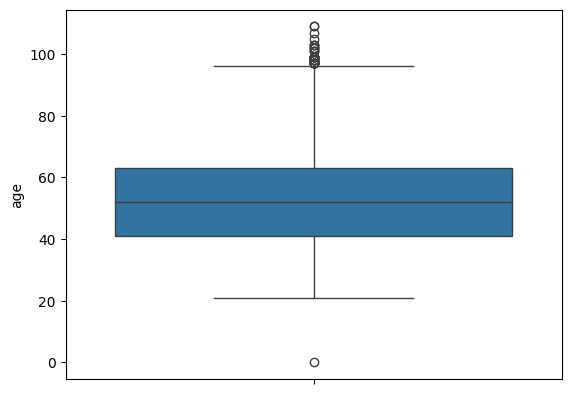

In [ ]:
sns.boxplot(util_dropped['age'])

there is one outlier point 0 bcoz age=0 is not possible, you may or may not remove it as it will not impact much. however age>100 can be considered so leave it

now moving on to next variable, NumberOfTime30-59DaysPastDueNotWorse

In [ ]:
util_dropped.groupby(['NumberOfTime30-59DaysPastDueNotWorse']).size()

,0
NumberOfTime30-59DaysPastDueNotWorse,
0,125804
1,16020
2,4588
3,1750
4,747
5,342
6,140
7,54
8,25


here we can see after 13 it jumps directly to 96. there are 3 similar type of variables in the data we will analyse for all 3

In [ ]:
util_dropped.groupby(['NumberOfTime60-89DaysPastDueNotWorse']).size()

,0
NumberOfTime60-89DaysPastDueNotWorse,
0,142166
1,5723
2,1117
3,318
4,104
5,34
6,16
7,8
8,2


here also after 11 it jumps to 96

In [ ]:
util_dropped.groupby(['NumberOfTimes90DaysLate']).size()

,0
NumberOfTimes90DaysLate,
0,141429
1,5238
2,1554
3,666
4,291
5,131
6,80
7,38
8,20


here also after 17 it jumps to 96

we will pick an of these 3 variables and try to see the impact on default rate

out of the three 17 is the highest number so use this variable. we will check for values >96

In [ ]:
util_dropped[util_dropped['NumberOfTimes90DaysLate']>96].groupby(['SeriousDlqin2yrs']).size()

,0
SeriousDlqin2yrs,
0,121
1,143


there is a significant no of defaulters so we cannot delete it

now moving on to next variable debtratio

In [ ]:
util_dropped['DebtRatio'].describe()

,DebtRatio
count,149759.000000
mean,352.652789
std,2038.203228
min,0.000000
25%,0.174960
50%,0.366483
75%,0.866946
max,329664.000000


<Axes: xlabel='DebtRatio', ylabel='Density'>

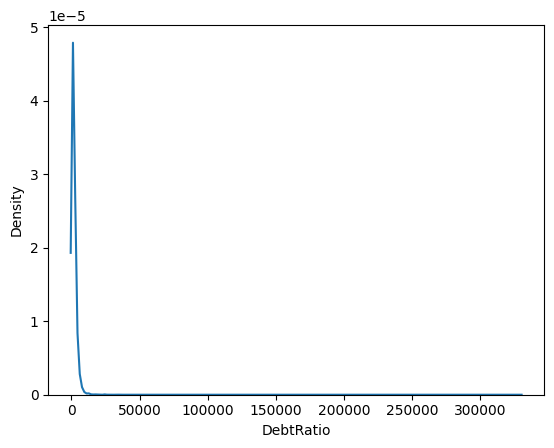

In [ ]:
#visualising the data
sns.kdeplot(util_dropped['DebtRatio'])

we can see here most of the data is around 0-1, others are absolutely outliers. Now let's see how these values are distributed by finding quantiles

In [ ]:
util_dropped['DebtRatio'].quantile([.9]) #finding 90th quantile

,DebtRatio
0.9,1265.0


value for 90th quantile is 1263 which is still much less than the max value (last row of describe cell before graph)

In [ ]:
util_dropped['DebtRatio'].quantile([.975])

,DebtRatio
0.975,3487.05


now let's take this value as threshold and do the analysis using this value

In [ ]:
#describe on basis of defaulter value
util_dropped[util_dropped['DebtRatio']>3488][['SeriousDlqin2yrs']].describe()

,SeriousDlqin2yrs
count,3740.000000
mean,0.064439
std,0.245565
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
#now we describe including monthly income also
util_dropped[util_dropped['DebtRatio']>3488][['SeriousDlqin2yrs','MonthlyIncome']].describe()

,SeriousDlqin2yrs,MonthlyIncome
count,3740.000000,3740.000000
mean,0.064439,4800.805348
std,0.245565,1696.280908
min,0.000000,0.000000
25%,0.000000,5400.000000
50%,0.000000,5400.000000
75%,0.000000,5400.000000
max,1.000000,5400.000000


now checking if there are some records where defaulter value and monthly income value is same

In [ ]:
temp=util_dropped[(util_dropped['DebtRatio']>3488) & (util_dropped['SeriousDlqin2yrs']==util_dropped['MonthlyIncome'])]
temp.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,76187.340314,0.005236,0.318318,53.526178,0.206806,6495.032723,0.005236,10.185864,0.028796,2.099476,0.036649,0.518325
std,44349.145168,0.072262,0.447572,11.322201,0.590081,12972.785207,0.072262,4.952744,0.182454,1.363395,0.214237,1.144852
min,91.000000,0.000000,0.000000,26.000000,0.000000,3495.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,37514.250000,0.000000,0.030189,46.000000,0.000000,3956.250000,0.000000,7.000000,0.000000,1.000000,0.000000,0.000000
50%,75179.500000,0.000000,0.183463,52.000000,0.000000,4607.500000,0.000000,9.000000,0.000000,2.000000,0.000000,0.000000
75%,117887.250000,0.000000,0.501245,61.000000,0.000000,5580.750000,0.000000,13.000000,0.000000,3.000000,0.000000,0.000000
max,149674.000000,1.000000,6.425716,84.000000,4.000000,220516.000000,1.000000,31.000000,2.000000,15.000000,2.000000,10.000000


here we can see that the values for defaulter value column and monthly income column are same which means that it could be a data entry error

now let's see the proportion of these values on the basis of which we will decide whether we can remove these records or not

In [ ]:
temp.groupby(['SeriousDlqin2yrs']).size()

,0
SeriousDlqin2yrs,
0,380
1,2


mostly there are non defaulters so we can remove these records(364 records)

In [ ]:
dRatio = util_dropped.drop(util_dropped[(util_dropped['DebtRatio']>3488) & (util_dropped['SeriousDlqin2yrs']==util_dropped['MonthlyIncome'])].index)
dRatio.shape

(149377, 12)

now the preprocessing part has been completed. now we'll start making the model for this data. for model building we'll use XGBoost

In [ ]:
pip install Xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

now lets create the model

In [ ]:
model=XGBClassifier(tree_method='exact')

In [ ]:
x=dRatio.drop(['SeriousDlqin2yrs'],axis=1) #here from x dataframe we remove defaulter column
y=dRatio['SeriousDlqin2yrs'] #the defaulter column is placed in y dataframe

x is the set of independent variables and
y is the dependent variable

we will use x and y dataframes to train our model

In [ ]:
model.fit(x,y.values.ravel()) #this will fit our model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred=model.predict(x) #preciting value of y based on values of x
print(y_pred)

[1 0 0 ... 0 0 0]


In [ ]:
accuracy_score(y,y_pred) #checking accuracy

0.9472408737623597

we are getting 94% accuracy. Now we'll create the confusion matrix

In [ ]:
cm=confusion_matrix(y,y_pred)
cm

array([[138600,    770],
       [  7111,   2896]])

this is difficult to understand so we'll try to visualize the confusion matrix with a heatmap

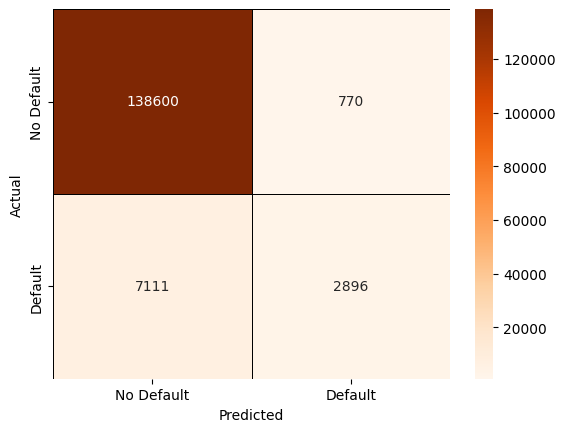

In [ ]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Oranges',linewidth=0.5,linecolor='black')
plt.xticks(np.arange(2)+.5,['No Default','Default'])
plt.yticks(np.arange(2)+.5,['No Default','Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    139370
           1       0.79      0.29      0.42     10007

    accuracy                           0.95    149377
   macro avg       0.87      0.64      0.70    149377
weighted avg       0.94      0.95      0.94    149377



Now, we'll use this model to predict defaulters for the test dataset where the defaulter column is empty

In [ ]:
x1=test.drop(['SeriousDlqin2yrs'],axis=1)
y1=model.predict(x1)
print(y1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 